In [1]:
import pandas as pd
from PIL import Image

# Load your CSV data (replace 'your_csv_file.csv' with the actual file path)
csv_file = 'train.csv'
df = pd.read_csv(csv_file)

# Create a dictionary to store image dimensions
image_dimensions = {}

# Iterate through unique image_ids
for image_id in df['image_id'].unique():
    # Assuming your images are in the 'train' folder (replace with actual path)
    image_path = f'train/{image_id}.png'
    
    try:
        # Open the image and get its dimensions
        img = Image.open(image_path)
        width, height = img.size
        image_dimensions[image_id] = {'width': width, 'height': height}
    except FileNotFoundError:
        print(f"Image '{image_id}.png' not found!")

# Update the DataFrame with width and height values
for index, row in df.iterrows():
    image_id = row['image_id']
    if image_id in image_dimensions:
        df.at[index, 'width'] = image_dimensions[image_id]['width']
        df.at[index, 'height'] = image_dimensions[image_id]['height']

# Save the updated DataFrame (replace 'updated_csv_file.csv' with desired output path)
df.to_csv('updated_csv_file.csv', index=False)
print("CSV file updated successfully!")


CSV file updated successfully!


In [3]:
import os
import cv2

input_folder = 'train'  # Replace with your actual input folder path
output_folder = 'resized_images'  # Replace with your desired output folder path

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith('.png'):
        image_path = os.path.join(input_folder, filename)
        img = cv2.imread(image_path)
        img_resized = cv2.resize(img, (512, 512))
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, img_resized)

print("Images resized successfully using OpenCV!")

Images resized successfully using OpenCV!


In [2]:
import pandas as pd
def normalize_bboxes(df):
    """
    Normalize bounding boxes in the dataframe.
    
    Args:
    df (pd.DataFrame): DataFrame containing the bounding boxes and image dimensions.
    
    Returns:
    pd.DataFrame: DataFrame with normalized bounding boxes.
    """
    # Normalize the bounding boxes
    df['x_min'] = df['x_min'] / df['width']
    df['y_min'] = df['y_min'] / df['height']
    df['x_max'] = df['x_max'] / df['width']
    df['y_max'] = df['y_max'] / df['height']
    
    return df

In [3]:
df = pd.read_csv('updated_csv_file.csv')

In [4]:
df_normalized = normalize_bboxes(df)

In [5]:
df_normalized.to_csv('train1.csv', index=False)

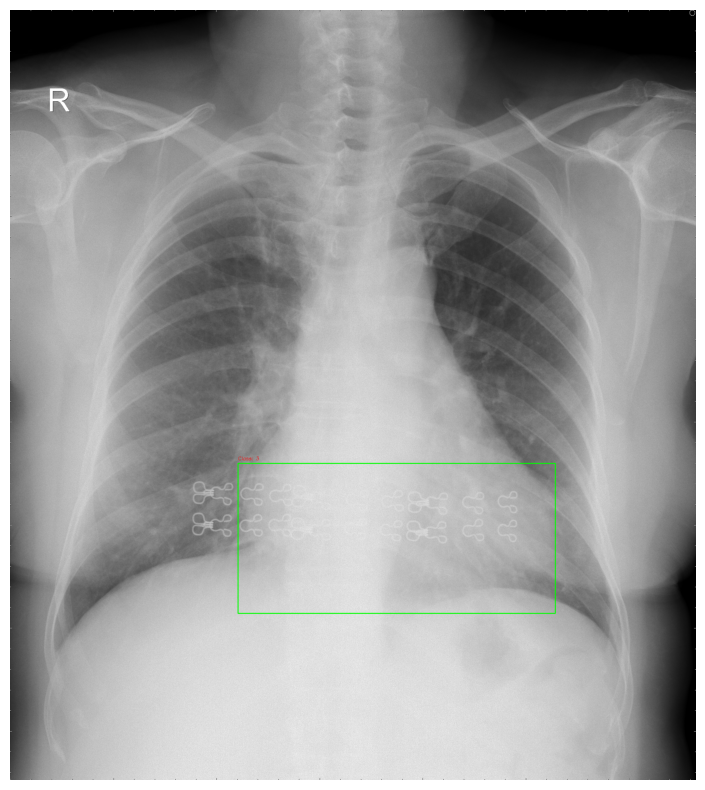

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_bounding_boxes(image_id, boxes, labels):
    # Load the image
    image_path = f'train/{image_id}.png'
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)  # Convert to RGB format

    # Normalize the image if necessary
    h, w, _ = image.shape

    # Check if bounding boxes are normalized to [0, 1] or are in absolute pixel values
    # If normalized, we scale them back to the image size
    if np.max(boxes) <= 1.0:  # If boxes are normalized
        boxes[:, [0, 2]] = boxes[:, [0, 2]] * w  # Scale x_min, x_max to width
        boxes[:, [1, 3]] = boxes[:, [1, 3]] * h  # Scale y_min, y_max to height

    # Iterate over each bounding box and draw it on the image
    for i, (x_min, y_min, x_max, y_max) in enumerate(boxes):
        label = labels[i]  # Get the corresponding class label
        # Draw rectangle on the image
        image = cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color=(0, 255, 0), thickness=2)
        # Put label near the top-left corner of the box
        cv2.putText(image, f'Class: {label}', (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image.astype(np.uint8))
    plt.axis("off")
    plt.show()

# Sample usage within your __getitem__ function
image_id = "9a5094b2563a1ef3ff50dc5c7ff71345"
boxes = np.array([[0.33221153846153845,	0.5886130136986302,	0.7947115384615384,	0.783818493]])  # Replace with your actual boxes
labels = [3]  # Replace with your actual labels
visualize_bounding_boxes(image_id, boxes, labels)
